In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
cvsDataframe = pd.read_csv('!03&04_17_VSE.csv', delimiter = ';', encoding='cp1251')
df = cvsDataframe

# Предварительный анализ и очистка данных

In [3]:
df.shape

(691539, 38)

In [4]:
columns = df.columns
for column in columns:
    print(column, end=', ')

Дата, ДатаДоставки, НомерЗаказаНаСайте, НовыйСтатус, СуммаЗаказаНаСайте, СуммаДокумента, МетодДоставки, ФормаОплаты, Регион, Группа2, Группа3, Группа4, Тип, Номенклатура, ТипТовара, Отменено, ПричинаОтмены, Количество, Цена, СуммаСтроки, ЦенаЗакупки, МесяцДатыЗаказа, ГодДатыЗаказа, ПВЗ_код, Статус, Гео, Маржа, СуммаУслуг, СуммаДоставки, НомерСтроки, КоличествоПроданоКлиенту, ДатаЗаказаНаСайте, Телефон_new, ЭлектроннаяПочта_new, Клиент, ID_SKU, ГородМагазина, МагазинЗаказа, 

В каждом столбце посмотрим: количество уникальных, нулевых значений, кол-во и долю NaN, а также тип данных

In [5]:
# columnsValues - функция для вывода этих значений
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

def columnsValues(df):
    data = []
    for column in df:
        data.append([column] + columnValues(df[column]))
    
    print(tabulate(data, headers = ['Column', 'Count Unique', 'Count Zeros', 'Count Nans', '% of NaNs', 'dtype'], tablefmt ='orgtbl'))

In [6]:
columnsValues(df)

| Column                   |   Count Unique |   Count Zeros |   Count Nans |   % of NaNs | dtype   |
|--------------------------+----------------+---------------+--------------+-------------+---------|
| Дата                     |          28887 |             0 |            0 |         0   | object  |
| ДатаДоставки             |            107 |             0 |          626 |         0.1 | object  |
| НомерЗаказаНаСайте       |         178418 |             0 |            4 |         0   | object  |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object  |
| СуммаЗаказаНаСайте       |          14316 |             0 |            0 |         0   | object  |
| СуммаДокумента           |          14747 |             0 |            0 |         0   | object  |
| МетодДоставки            |              7 |             0 |            0 |         0   | object  |
| ФормаОплаты              |              2 |             0 |            0 |         0   | 

Обратим внимание, что много числовых значений имеет тип object. Исправим это.

In [7]:
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].str.replace(' ', '').astype(int)
print(df['СуммаЗаказаНаСайте'].unique())

[12098  4819  3325 ... 17760 25130 14735]


In [8]:
df['СуммаДокумента'] = df['СуммаДокумента'].str.replace(',', '.').str.replace(' ', '').astype(float)
print(df['СуммаДокумента'].unique())

[12247.  3759.  3325. ... 25130. 19200. 14735.]


In [9]:
df['Цена'] = df['Цена'].str.replace(',', '.').str.replace(' ', '').astype(float)
print(df['Цена'].unique())

[ 680.    379.   3325.   ...  498.86 5710.   1561.7 ]


In [10]:
df['СуммаСтроки'] = df['СуммаСтроки'].str.replace(',', '.').str.replace(' ', '').astype(float)
print(df['СуммаСтроки'].unique())

[ 680.    379.   3325.   ...  498.86 5710.   1561.7 ]


In [11]:
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].str.replace(',', '.').str.replace(' ', '').astype(float)
print(df['ЦенаЗакупки'].unique())

[ 172.    209.8  1149.   ... 5063.45 2492.16  165.12]


In [12]:
df['Маржа'] = df['Маржа'].str.replace(',', '.').str.replace(' ', '').astype(float)
print(df['Маржа'].unique())

[ 508.    169.2  2176.   ...  387.23  900.7   580.5 ]


In [13]:
df['СуммаУслуг'] = df['СуммаУслуг'].str.replace(' ', '').astype(int)
print(df['СуммаУслуг'].unique())

[     0    300     49    350     99    290    440    340    180    600
    510   2200    265    230    150    220    550    390   1200   1000
    420    260    500    345    870   1300    330    280    680    750
    700   2000    250    450    515    315    430    380    410    490
    485    310    270    590   1230   2800   2300   3600   1870   1100
    800    770    900    690   1090   1070    670    400   2340    610
      1    360    275   4775   1600     98    760    660    240    279
    850    470   1800    460   1360   1700    255    650   1400   1545
   1105    540   1340   3250    860   2100   1030   5200    415   5900
   8350   1285   1520   2900   8060   6900   2950   1225  31920    475
    765   1050  13800   5500   4600   3300   4700   3900   4300    249
    149    349    325   2500    530   1540   1220    580  10840   9400
   1720    320   4270   3400   6800   6695   1500   1290   1080   2400
 115900   1900    820   1740    810   4200   8400   2580   1060   1365
   269

In [14]:
df['СуммаДоставки'] = df['СуммаДоставки'].str.replace(' ', '').astype(int)
print(df['СуммаДоставки'].unique())

[     0    300     49    350     99    290    440    340    180    600
    510   2200    265    230    150    220    550    390   1200   1000
    420    260    500    345    870   1300    330    280    680    750
    700   2000    250    450    515    315    430    380    410    490
    485    310    270    590   1230   2800   2300   3600   1870   1100
    800    770    900    690   1090   1070    670    400   2340    610
      1    360    275   4775   1600     98    760    660    240    279
    850    470   1800    460   1360   1700    255    650   1400   1545
   1105    540   1340   3250    860   2100   1030   5200    415   5900
   8350   1285   1520   2900   8060   6900   2950   1225  31920    475
    765   1050  13800   5500   4600   3300   4700   3900   4300    249
    149    349    325   2500    530   1540   1220    580  10840   9400
   1720    320   4270   3400   6800   6695   1500   1290   1080   2400
 115900   1900    820   1740    810   4200   8400   2580   1060   1365
   269

In [15]:
columnsValues(df)

| Column                   |   Count Unique |   Count Zeros |   Count Nans |   % of NaNs | dtype   |
|--------------------------+----------------+---------------+--------------+-------------+---------|
| Дата                     |          28887 |             0 |            0 |         0   | object  |
| ДатаДоставки             |            107 |             0 |          626 |         0.1 | object  |
| НомерЗаказаНаСайте       |         178418 |             0 |            4 |         0   | object  |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object  |
| СуммаЗаказаНаСайте       |          14316 |             6 |            0 |         0   | int64   |
| СуммаДокумента           |          14747 |         25772 |            0 |         0   | float64 |
| МетодДоставки            |              7 |             0 |            0 |         0   | object  |
| ФормаОплаты              |              2 |             0 |            0 |         0   | 

Столбцы 'ЭлектроннаяПочта_new' и 'Телефон_new' содержат данные, идентифицирующие пользователя. Оставим столбец с номерами телефонов, так как в нем нет пропущенных значений и количество уникальных гораздо выше. В столбце телефонов 6844 записи с номером 0, большую часть из них можно было бы идентифицировать по почте, но в нашем случае проще убрать все строки с этим значением.

In [16]:
df = df.drop(columns=['ЭлектроннаяПочта_new'])
df = df.loc[df['Телефон_new'] != '0']
df.shape

(684695, 37)

Сразу уберем столбцы, дублирующие другие, не нужные для нашего проекта. Сделать это без дополнительного анализа можем, так как значения в них не влияют на другие столбцы.

In [17]:
# столбцы, содержащие информцию о времени. Оставим один для rfm - 'ДатаЗаказаНаСайте'
df = df.drop(['Дата', 'ДатаДоставки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа'], axis=1)
df.shape

(684695, 33)

In [18]:
# столбцы, содержащие информацию о геопозиции
df = df.drop(['Регион', 'ПВЗ_код', 'Гео', 'ГородМагазина', 'МагазинЗаказа'], axis=1)
df.shape

(684695, 28)

In [19]:
# а так же:
df = df.drop(['Клиент', 'ID_SKU'], axis=1)
df.shape

(684695, 26)

Посмотрим получившийся датасет на предмет уникальных, нулевых и т.п. значений

In [20]:
columnsValues(df)

| Column                   |   Count Unique |   Count Zeros |   Count Nans |   % of NaNs | dtype   |
|--------------------------+----------------+---------------+--------------+-------------+---------|
| НомерЗаказаНаСайте       |         176149 |             0 |            0 |         0   | object  |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object  |
| СуммаЗаказаНаСайте       |          14261 |             2 |            0 |         0   | int64   |
| СуммаДокумента           |          14694 |         25134 |            0 |         0   | float64 |
| МетодДоставки            |              7 |             0 |            0 |         0   | object  |
| ФормаОплаты              |              2 |             0 |            0 |         0   | object  |
| Группа2                  |             13 |             0 |        73768 |        10.8 | object  |
| Группа3                  |             93 |             0 |        73768 |        10.8 | 

Перед тем как снова убирать не нужные нам столбцы, строки с пустыми и нулевыми значениями, проанализируем их. Это необходимо, чтобы не убрать лишнее и не оставить данные, которые могут испортить сегментации

In [21]:
# Сразу оставим не отмененные заказы
df=df.loc[df['Отменено'] == 'Нет']

Посмотрим на распределение заказов по столбцам 'НовыйСтатус' и 'Статус' в совокупности с помощью Excel. Стоит отметить, что на данном этапе аналитика в Excel проводилась на изачальном датасете, поэтому возможны минимальные расхождения в суммарном количестве, что не важно, так как мы делаем ее для понимания данных

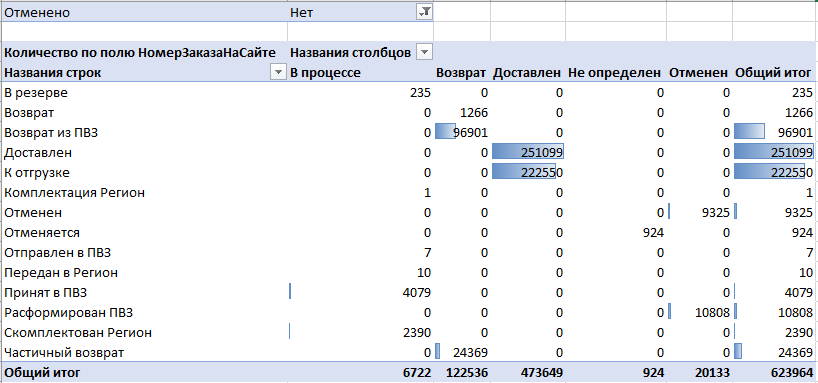

В столбце 'Статус' нас будет интересовать только категория "Доставлен". Остальные чеки включают в себя заказы, не дошедшие до покупателя по причинам, указанным в столбце 'НовыйСтатус'. Значительную часть от объема содержит категория "Возврат". Тут выделяются "Возврат из ПВЗ" и "Частичный возврат". Тем не менее, от всех этих чеков тоже избавимся, чтобы они не оказывали влияние на чистые данные

In [22]:
df=df.loc[df['Статус'] == 'Доставлен']
df=df.loc[((df['НовыйСтатус'] == 'Доставлен') | (df['НовыйСтатус'] == 'К отгрузке'))]

При анализе оставшихся статусов с точки зрения способов получения заказа получаем интересный результат. "Доставлен" есть у заказов, купленных непосредственно в магазине, кроме одного, скорее всего ошибочного. Остальные же полностью относятся ко второму статусу, поэтому оставляем их. Теперь можем удалить столбцы со статусами.

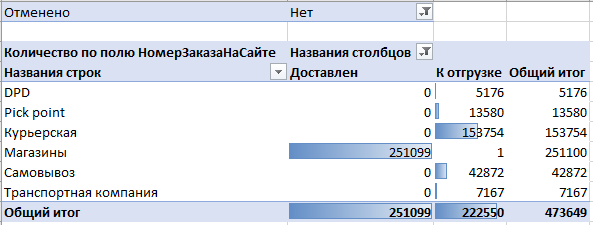

In [23]:
df=df.loc[~((df['НовыйСтатус'] == 'К отгрузке') & (df['МетодДоставки'] == 'Магазины'))]
df = df.drop(['Статус', 'НовыйСтатус'], axis=1)
df.shape

(471905, 24)

In [24]:
columnsValues(df)

| Column                   |   Count Unique |   Count Zeros |   Count Nans |   % of NaNs | dtype   |
|--------------------------+----------------+---------------+--------------+-------------+---------|
| НомерЗаказаНаСайте       |         120577 |             0 |            0 |         0   | object  |
| СуммаЗаказаНаСайте       |          11806 |             2 |            0 |         0   | int64   |
| СуммаДокумента           |          12365 |             0 |            0 |         0   | float64 |
| МетодДоставки            |              6 |             0 |            0 |         0   | object  |
| ФормаОплаты              |              2 |             0 |            0 |         0   | object  |
| Группа2                  |             13 |             0 |        51048 |        10.8 | object  |
| Группа3                  |             92 |             0 |        51048 |        10.8 | object  |
| Группа4                  |            405 |             0 |        74722 |        15.8 | 

In [25]:
# Этот столбец тоже можем убрать, так как он полностью пустой
df = df.drop('ПричинаОтмены', axis=1)

In [26]:
# Не интересуют чеки, в кототорых 'Продано клиенту' равно 0
df = df.loc[df['КоличествоПроданоКлиенту'] > 0]

В категориях товаров разного уровня много значений NaN. Их количество в 'Группа2', 'Группа 3' и 'ТипТовара' совпадает. Проанализировав в экселе столбец 'Номенклатура', делаем вывод, что все эти чеки на доставку. В анализе товаров она нам не нужна.

In [27]:
df = df.loc[df['Номенклатура'] != 'Доставка']
df.shape

(373766, 23)

В группе 4 у оставшихся товаров есть значение NaN, это обусловлено отсутствием самой глубокой категории у них. Теперь можем удалить 'Группа3' и 'Группа4'. Они слишком глубокие и включают слишком большой набор уникальных значений.

In [28]:
df = df.drop(['Группа3', 'Группа4'], axis=1)

In [29]:
df.shape

(373766, 21)

In [30]:
columnsValues(df)

| Column                   |   Count Unique |   Count Zeros |   Count Nans |   % of NaNs | dtype   |
|--------------------------+----------------+---------------+--------------+-------------+---------|
| НомерЗаказаНаСайте       |         114805 |             0 |            0 |         0   | object  |
| СуммаЗаказаНаСайте       |          11216 |             2 |            0 |         0   | int64   |
| СуммаДокумента           |          11716 |             0 |            0 |         0   | float64 |
| МетодДоставки            |              6 |             0 |            0 |         0   | object  |
| ФормаОплаты              |              2 |             0 |            0 |         0   | object  |
| Группа2                  |             13 |             0 |            0 |         0   | object  |
| Тип                      |              5 |             0 |            0 |         0   | object  |
| Номенклатура             |          55083 |             0 |            0 |         0   | 

Так как набор данных сильно изменился, выгрузим таблицу в Excel. Это упростит анализ оставшихся значений. (Закомментировано, чтобы время выполнения тетради было меньше при запуске всех ячеек

In [31]:
# df_saved_1 = df
# df_saved_1.to_excel('saved_data_1.xlsx', index=False)

In [32]:
# df_saved_1 = pd.read_excel('saved_data_1.xlsx')
# df = df_saved_1

Не будем рассматривать строки, в которых цена закупки и маржа неизвестны

In [33]:
df.dropna(subset=['ЦенаЗакупки', 'Маржа'], inplace=True)

Теперь пробежимся по значениям в экселе, чтобы найти значения, которые нам не подходят

In [34]:
# Столбец 'Отменено' содержит только значения "нет", уберем его
df = df.drop(['Отменено'], axis=1)

In [35]:
# Есть строки с отрицательной и нулевой маржой. Скорее всего это распродажа остатков на складе. Их количество:
len(df[df['Маржа'] <= 0])

16181

In [36]:
# Удалим их, чтобы они не влияли на точность сегментаций
df = df.loc[df['Маржа'] > 0]

In [37]:
# Столбец 'НомерСтроки' нам не нужен
df = df.drop(['НомерСтроки'], axis=1)

Теперь удалим столбцы, дулбирующие друг друга по смыслу

In [38]:
# Столбцы 'СуммаЗаказаНаСайте' и 'СуммаДокумента' отличаются
df_temp = df.loc[df['СуммаЗаказаНаСайте'] != df['СуммаДокумента']]
df_temp = df_temp.sort_values(by=['НомерЗаказаНаСайте']).head(5)
df_temp[['НомерЗаказаНаСайте', 'СуммаЗаказаНаСайте', 'СуммаДокумента', 'Количество', 'Цена', 'СуммаСтроки', 'СуммаУслуг', 'СуммаДоставки', 'КоличествоПроданоКлиенту']]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Количество,Цена,СуммаСтроки,СуммаУслуг,СуммаДоставки,КоличествоПроданоКлиенту
222512,1303000326_TR,31658,21779.0,1,11900.0,11900.0,0,0,1
73340,1303000327_TR,13010,4460.0,1,4460.0,4460.0,0,0,1
44394,1306000843_TR,4499,4849.0,1,4499.0,4499.0,350,350,1
52817,1306000848_TR,5399,5749.0,1,5399.0,5399.0,350,350,1
70978,1856000686_TR,9179,6099.0,1,6099.0,6099.0,0,0,1


На примере заказа 1303000326_TR видим расхождение между суммой заказа на сайте, суммой документа и стоимостью проданного товара. Очевидно, что в этом заказе должны быть еще товары, которые оказались удалены. Найдем весь заказ в изначальном датасете.

In [39]:
cvsDataframe.loc[cvsDataframe['НомерЗаказаНаСайте'] == '1303000326_TR']

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
149108,28.03.2017 9:55,14.04.2017 0:00,1303000326_TR,Доставлен,31658,21779.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ ЕВРОПА,КГТ,"CHICCO, КОЛЯСКА прогул. Simplicity Plus Top Re...",КГТ,Да,5.3 Другое,1,9879.0,9879.0,8021.0,3,2 017,23111,Доставлен,Регионы,1858.0,0,0,1,1,27.03.2017 0:00,55574851-52545454555374,NaN,Лодырь,IDL00017812856,Краснодар,STORE_111
222511,28.03.2017 9:55,14.04.2017 0:00,1303000326_TR,Доставлен,31658,21779.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ ЕВРОПА,КГТ,"CHICCO, КОЛЯСКА прогул. Simplicity Plus Top Sa...",КГТ,Нет,NaN,1,9879.0,9879.0,8021.0,3,2 017,23111,Доставлен,Регионы,1858.0,0,0,3,0,27.03.2017 0:00,55574851-52545454555374,NaN,Лодырь,IDL00030305654,Краснодар,STORE_111
222512,28.03.2017 9:55,14.04.2017 0:00,1303000326_TR,Доставлен,31658,21779.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ ЕВРОПА,КГТ,"CHICCO, КОЛЯСКА прогул. Simplicity Plus Top, (...",КГТ,Нет,NaN,1,11900.0,11900.0,8021.0,3,2 017,23111,Доставлен,Регионы,3879.0,0,0,2,1,27.03.2017 0:00,55574851-52545454555374,NaN,Лодырь,IDL00023103452,Краснодар,STORE_111


Видим, что товар в строке 149108 отменен, а в 222511 количество продано клиенту = 0. Второе возможно по причине ошибки, так как сумма документа на два товара. Тем не менее, подобные строки мы удалили. Поэтому в дальнейшем при составлении таблицы по клиентам придется пересчитать сумму чека под товары, которые остались.

In [40]:
# Удаляем столбцы, связанные с суммой заказа
df = df.loc[df['СуммаЗаказаНаСайте'] > 0]
df = df.drop(['СуммаЗаказаНаСайте', 'СуммаДокумента'], axis=1)

In [41]:
# Эти столбцы там тоже больше не нужны
df = df.drop(['Номенклатура', 'ТипТовара', 'ЦенаЗакупки', 'КоличествоПроданоКлиенту'], axis=1)

In [42]:
df = df.drop(['СуммаУслуг', 'СуммаДоставки'], axis=1)

In [43]:
columnsValues(df)

| Column             |   Count Unique |   Count Zeros |   Count Nans |   % of NaNs | dtype   |
|--------------------+----------------+---------------+--------------+-------------+---------|
| НомерЗаказаНаСайте |         110106 |             0 |            0 |           0 | object  |
| МетодДоставки      |              6 |             0 |            0 |           0 | object  |
| ФормаОплаты        |              2 |             0 |            0 |           0 | object  |
| Группа2            |             13 |             0 |            0 |           0 | object  |
| Тип                |              5 |             0 |            0 |           0 | object  |
| Количество         |             60 |             0 |            0 |           0 | int64   |
| Цена               |          12004 |             0 |            0 |           0 | float64 |
| СуммаСтроки        |          12703 |             0 |            0 |           0 | float64 |
| Маржа              |          32413 |           

In [44]:
df.shape

(356673, 11)

В итоге у нас получилось 51,5% чистых данных

# Анализ и построение витрины по клиентам

Для начала посмотрим распределение данных в столбцах

## 1) Уникальные значения для каждой строки

Посмотрим на количественное и процентное соотношение товаров в категории 'Группа2', распределение выручки по ним

In [45]:
aggs = {'Количество' : ['sum', lambda x: (x.sum() / df['Количество'].sum() * 100).round()], 'СуммаСтроки' : lambda y: (y.sum() / df['СуммаСтроки'].sum() * 100).round()}
df[['Группа2', 'Количество', 'СуммаСтроки']].groupby('Группа2').agg(aggs)

Количество            СуммаСтроки
                                 sum <lambda_0>    <lambda>
Группа2                                                    
ДЕТСКОЕ ПИТАНИЕ               257817       45.0        10.0
ЖЕНСКИЕ ШТУЧКИ                   614        0.0         0.0
ИГРУШКИ                        77067       13.0        15.0
КАНЦТОВАРЫ, КНИГИ, ДИСКИ       19068        3.0         1.0
КОСМЕТИКА/ГИГИЕНА              43576        8.0         2.0
КРУПНОГАБАРИТНЫЙ ТОВАР         24594        4.0        38.0
ОБУВЬ                           9175        2.0         3.0
ПОДГУЗНИКИ                     51806        9.0        15.0
СОПУТСТВУЮЩИЕ ТОВАРЫ             783        0.0         0.0
ТЕКСТИЛЬ, ТРИКОТАЖ             53652        9.0        11.0
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА         28        0.0         0.0
ТОВАРЫ ДЛЯ ЖИВОТНЫХ             9905        2.0         1.0
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ           24460        4.0         3.0

Аналогично посмотрим для категории 'Тип'

In [46]:
aggs = {'Количество' : ['sum', lambda x: (x.sum() / df['Количество'].sum() * 100).round()], 'СуммаСтроки' : lambda y: (y.sum() / df['СуммаСтроки'].sum() * 100).round()}
df[['Тип', 'Количество', 'СуммаСтроки']].groupby('Тип').agg(aggs)

Количество            СуммаСтроки
               sum <lambda_0>    <lambda>
Тип                                      
ИГРУШКИ      96135       17.0        16.0
ИНОЕ         10547        2.0         1.0
КГТ          24594        4.0        38.0
ОДЕЖДА       62827       11.0        14.0
ППКП        378442       66.0        31.0

Сделаем кодирование категориальных столбцов 'Тип' и 'Группа2'

In [47]:
df = pd.get_dummies(df, prefix=['Тип_', ''], prefix_sep='', columns=['Тип', 'Группа2'], dtype=int)

Так как в строке может быть не один товар, в новых столбцах отобразим количество

In [48]:
df['Тип_ИГРУШКИ'] = df['Тип_ИГРУШКИ'] * df['Количество']
df['Тип_ИНОЕ'] = df['Тип_ИНОЕ'] * df['Количество']
df['Тип_КГТ'] = df['Тип_КГТ'] * df['Количество']
df['Тип_ОДЕЖДА'] = df['Тип_ОДЕЖДА'] * df['Количество']
df['Тип_ППКП'] = df['Тип_ППКП'] * df['Количество']

df['ДЕТСКОЕ ПИТАНИЕ'] = df['ДЕТСКОЕ ПИТАНИЕ'] * df['Количество']
df['ЖЕНСКИЕ ШТУЧКИ'] = df['ЖЕНСКИЕ ШТУЧКИ'] * df['Количество']
df['ИГРУШКИ'] = df['ИГРУШКИ'] * df['Количество']
df['КАНЦТОВАРЫ, КНИГИ, ДИСКИ'] = df['КАНЦТОВАРЫ, КНИГИ, ДИСКИ'] * df['Количество']
df['КОСМЕТИКА/ГИГИЕНА'] = df['КОСМЕТИКА/ГИГИЕНА'] * df['Количество']
df['КРУПНОГАБАРИТНЫЙ ТОВАР'] = df['КРУПНОГАБАРИТНЫЙ ТОВАР'] * df['Количество']
df['ОБУВЬ'] = df['ОБУВЬ'] * df['Количество']
df['ПОДГУЗНИКИ'] = df['ПОДГУЗНИКИ'] * df['Количество']
df['СОПУТСТВУЮЩИЕ ТОВАРЫ'] = df['СОПУТСТВУЮЩИЕ ТОВАРЫ'] * df['Количество']
df['ТЕКСТИЛЬ, ТРИКОТАЖ'] = df['ТЕКСТИЛЬ, ТРИКОТАЖ'] * df['Количество']
df['ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'] = df['ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'] * df['Количество']
df['ТОВАРЫ ДЛЯ ЖИВОТНЫХ'] = df['ТОВАРЫ ДЛЯ ЖИВОТНЫХ'] * df['Количество']
df['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'] = df['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'] * df['Количество']

In [49]:
# Проверим
df.loc[df['Количество'] > 1].head()

,НомерЗаказаНаСайте,МетодДоставки,ФормаОплаты,Количество,Цена,СуммаСтроки,Маржа,ДатаЗаказаНаСайте,Телефон_new,Тип_ИГРУШКИ,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
107,4007021_TR,Магазины,Безналичная,2,149.0,298.0,148.0,01.03.2017 0:00,55574953-50515353505374,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0
160,4011723_TR,Курьерская,Наличная,2,479.0,958.0,710.0,02.03.2017 0:00,55575054-51545353545778,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
187,4015792_TR,Курьерская,Наличная,2,304.0,608.0,200.0,02.03.2017 0:00,55575054-48514853525672,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
214,4027132_TR,Магазины,Безналичная,2,5.4,10.8,3.1,03.03.2017 0:00,55574949-50534850524874,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
267,4062166_TR,Магазины,Безналичная,2,816.0,1632.0,348.6,06.03.2017 0:00,55574953-48485154505079,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0


In [50]:
# На всякий случай сохраним текущие данные в эксель таблицу
# df_saved_2 = df
# df_saved_2.to_excel('saved_data_2.xlsx', index=False)

In [51]:
# df_saved_2 = pd.read_excel('saved_data_1.xlsx')
# df = df_saved_2

In [52]:
# Столбец 'Цена' нам больше не нужен, так как по смыслу для чеков его заменит 'СуммаСтроки'
df = df.drop(['Цена'], axis=1)

Теперь можно сгруппировать данные по чекам

In [53]:
# Уберем дупликаты заказов, выбрав столбцы, одинаковые для всего заказа. Получим основу для таблицы по заказам
orders = df.drop_duplicates(subset = 'НомерЗаказаНаСайте')
orders = orders[['НомерЗаказаНаСайте', 'МетодДоставки', 'ФормаОплаты', 'ДатаЗаказаНаСайте', 'Телефон_new']]
orders = orders.reset_index(drop=True)
orders_numeric = df.drop(['МетодДоставки', 'ФормаОплаты', 'ДатаЗаказаНаСайте', 'Телефон_new'], axis=1)
orders_numeric = orders_numeric.groupby(['НомерЗаказаНаСайте']).sum()
orders = orders.merge(orders_numeric, left_on = ['НомерЗаказаНаСайте'], right_on = ['НомерЗаказаНаСайте'], how = 'left')
orders.head()

,НомерЗаказаНаСайте,МетодДоставки,ФормаОплаты,ДатаЗаказаНаСайте,Телефон_new,Количество,СуммаСтроки,Маржа,Тип_ИГРУШКИ,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,3999117_TR,Магазины,Безналичная,01.03.2017 0:00,55575453-56535648535679,10,3759.0,811.39,4,0,0,3,3,0,0,1,3,0,0,0,3,0,3,0,0,0
1,3999122_TR,Магазины,Безналичная,01.03.2017 0:00,55574950-57515657535772,1,3325.0,2176.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3999411_TR,Магазины,Безналичная,01.03.2017 0:00,55574854-56495552515179,4,528.0,204.07,2,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,2
3,3999682_TR,Курьерская,Наличная,01.03.2017 0:00,55574851-53495753545674,6,2962.0,653.92,5,0,0,1,0,0,0,4,1,0,0,0,0,0,1,0,0,0
4,3999713_TR,Магазины,Безналичная,01.03.2017 0:00,55574948-52515357485779,3,1147.0,354.54,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,0


## 2. Анализ и преобразование значений на уровне заказа

Начнем с анализа методов доставки

In [54]:
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

/var/folders/fr/zst5qk_n0qq1fjn6yxf5jmg00000gn/T/ipykernel_57886/3210902619.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


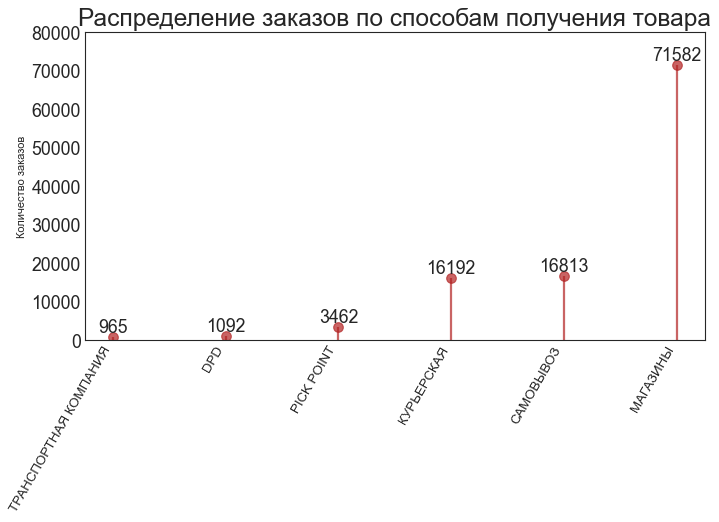

In [55]:
# Prepare Data
delivery_plot = orders[['НомерЗаказаНаСайте', 'МетодДоставки']].groupby('МетодДоставки').count()
delivery_plot.sort_values('НомерЗаказаНаСайте', inplace=True)
delivery_plot.reset_index(inplace=True)
delivery_plot.rename(columns = {'НомерЗаказаНаСайте' : 'number'}, inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10,5), dpi= 80)
ax.vlines(x=delivery_plot.index, ymin=0, ymax=delivery_plot.number, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=delivery_plot.index, y=delivery_plot.number, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Распределение заказов по способам получения товара', fontdict={'size':22})
ax.set_ylabel('Количество заказов')
ax.set_xticks(delivery_plot.index)
ax.set_xticklabels(delivery_plot['МетодДоставки'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 80000)

# Annotate
for row in delivery_plot.itertuples():
    ax.text(row.Index, row.number, s=round(row.number, 0), horizontalalignment= 'center', verticalalignment='bottom', fontsize=16)

plt.show()

In [56]:
# Объединим способы доставки в более крупные категории и закодируем
orders = orders.replace({'Транспортная компания': 'Доставка', 'DPD': 'Доставка', 'Pick point': 'Доставка', 'Курьерская': 'Доставка'})
orders = pd.get_dummies(orders, prefix=[''], prefix_sep='', columns=['МетодДоставки'], dtype=int)

Аналогично посмотрим способы оплаты

In [57]:
orders.groupby('ФормаОплаты').count()['НомерЗаказаНаСайте']

ФормаОплаты
Безналичная    77100
Наличная       33006
Name: НомерЗаказаНаСайте, dtype: int64

In [58]:
orders = pd.get_dummies(orders, prefix=[''], prefix_sep='', columns=['ФормаОплаты'], dtype=int)

А так же построим график для суммы строки

/var/folders/fr/zst5qk_n0qq1fjn6yxf5jmg00000gn/T/ipykernel_57886/2802315575.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(price_plot, shade=True, color="g", label="", alpha=.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


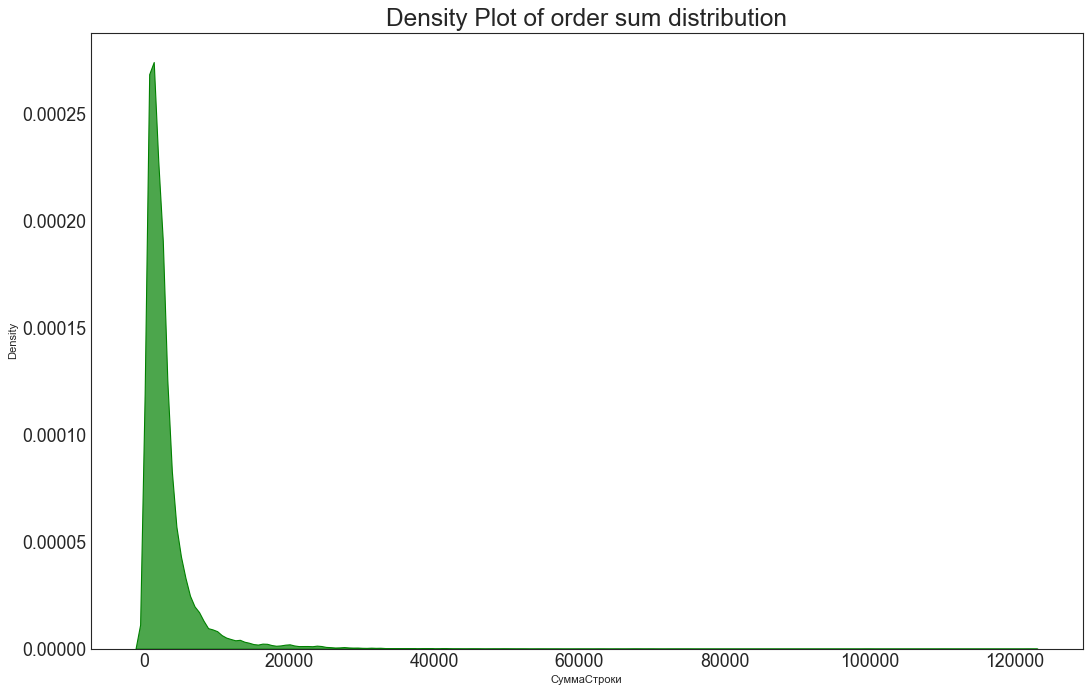

In [59]:
price_plot = orders['СуммаСтроки'].sort_values()
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(price_plot, shade=True, color="g", label="", alpha=.7)

# Decoration
plt.title('Density Plot of order sum distribution', fontsize=22)
plt.legend()
plt.show()

Стоимость большей части заказов находится в диапазоне от 50 до 2000 рублей

In [60]:
orders['СуммаСтроки'].min(), orders['СуммаСтроки'].max()

(4.0, 121955.0)

Теперь соберем таблицу по клиентам

In [61]:
clients = orders[['Телефон_new', 'НомерЗаказаНаСайте']].groupby('Телефон_new').count().reset_index()
clients

,Телефон_new,НомерЗаказаНаСайте
0,32555749-545749525150 .,1
1,55494851-56495152535476,1
2,55505353-48575248535072,1
3,55525753-51504955564975,1
4,55525753-51515749525079,1
...,...,...
80950,57484948-48505057565793,1
80951,57495452-49485054525597,1
80952,57495456-48525056575193,1
80953,57545657-49575257555799,1


In [62]:
last_date = orders[['Телефон_new', 'ДатаЗаказаНаСайте']].groupby('Телефон_new').max().reset_index()
last_date

,Телефон_new,ДатаЗаказаНаСайте
0,32555749-545749525150 .,07.04.2017 0:00
1,55494851-56495152535476,22.03.2017 0:00
2,55505353-48575248535072,09.03.2017 0:00
3,55525753-51504955564975,11.04.2017 0:00
4,55525753-51515749525079,21.03.2017 0:00
...,...,...
80950,57484948-48505057565793,29.03.2017 0:00
80951,57495452-49485054525597,10.04.2017 0:00
80952,57495456-48525056575193,06.03.2017 0:00
80953,57545657-49575257555799,24.03.2017 0:00


In [63]:
clients = clients.merge(last_date, left_on = ['Телефон_new'], right_on = ['Телефон_new'], how = 'left')
clients

,Телефон_new,НомерЗаказаНаСайте,ДатаЗаказаНаСайте
0,32555749-545749525150 .,1,07.04.2017 0:00
1,55494851-56495152535476,1,22.03.2017 0:00
2,55505353-48575248535072,1,09.03.2017 0:00
3,55525753-51504955564975,1,11.04.2017 0:00
4,55525753-51515749525079,1,21.03.2017 0:00
...,...,...,...
80950,57484948-48505057565793,1,29.03.2017 0:00
80951,57495452-49485054525597,1,10.04.2017 0:00
80952,57495456-48525056575193,1,06.03.2017 0:00
80953,57545657-49575257555799,1,24.03.2017 0:00


In [64]:
clients_numeric = orders.drop(['НомерЗаказаНаСайте', 'ДатаЗаказаНаСайте'], axis=1)
clients_numeric = clients_numeric.groupby('Телефон_new').sum()
clients = clients.merge(clients_numeric, left_on = ['Телефон_new'], right_on = ['Телефон_new'], how = 'left')

## 3. Витрина по клиентам, доработка и анализ

In [65]:
clients.rename(columns = {'Телефон_new' : 'id', 'НомерЗаказаНаСайте' : 'КоличествоЗаказов', 'ДатаЗаказаНаСайте' : 'ПоследнийЗаказ', 'Количество' : 'КоличествоТоваров'}, inplace = True)

In [66]:
clients.rename(columns = {'СуммаСтроки' : 'Выручка'}, inplace = True)

In [67]:
clients.head()

,id,КоличествоЗаказов,ПоследнийЗаказ,КоличествоТоваров,Выручка,Маржа,Тип_ИГРУШКИ,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Доставка,Магазины,Самовывоз,Безналичная,Наличная
0,32555749-545749525150 .,1,07.04.2017 0:00,5,1039.0,174.66,5,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,55494851-56495152535476,1,22.03.2017 0:00,1,1630.0,376.02,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,55505353-48575248535072,1,09.03.2017 0:00,1,7666.0,501.28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,55525753-51504955564975,1,11.04.2017 0:00,8,876.0,112.28,0,0,0,0,8,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,55525753-51515749525079,1,21.03.2017 0:00,2,3210.0,324.78,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [68]:
clients.reset_index(inplace=True)

In [69]:
clients.rename(columns = {'index' : 'ID'}, inplace = True)

In [70]:
clients = clients.drop(['id'], axis=1)

In [71]:
clients['СреднийЧек'] = clients['Выручка'] / clients['КоличествоЗаказов']

In [72]:
clients['СреднеееЧислоТоваровЧека'] = clients['КоличествоТоваров'] / clients['КоличествоЗаказов']

In [73]:
clients['СредняяМаржа'] = clients['Маржа'] / clients['КоличествоТоваров']

Добавим соотношение в долях для типа товара

In [74]:
clients['Тип_ИГРУШКИ_П'] = clients['Тип_ИГРУШКИ'] / clients['КоличествоТоваров']

In [75]:
clients['Тип_ИНОЕ_П'] = clients['Тип_ИНОЕ'] / clients['КоличествоТоваров']

In [76]:
clients['Тип_КГТ_П'] = clients['Тип_КГТ'] / clients['КоличествоТоваров']

In [77]:
clients['Тип_ОДЕЖДА_П'] = clients['Тип_ОДЕЖДА'] / clients['КоличествоТоваров']

In [78]:
clients['Тип_ППКП_П'] = clients['Тип_ППКП'] / clients['КоличествоТоваров']

Рассчитаем долю товаров от общего количества покупок в группе2

In [79]:
clients['ДЕТСКОЕ ПИТАНИЕ'] = clients['ДЕТСКОЕ ПИТАНИЕ'] / clients['КоличествоТоваров']

In [80]:
clients['ЖЕНСКИЕ ШТУЧКИ'] = clients['ЖЕНСКИЕ ШТУЧКИ'] / clients['КоличествоТоваров']

In [81]:
clients['ИГРУШКИ'] = clients['ИГРУШКИ'] / clients['КоличествоТоваров']

In [82]:
clients['КАНЦТОВАРЫ, КНИГИ, ДИСКИ'] = clients['КАНЦТОВАРЫ, КНИГИ, ДИСКИ'] / clients['КоличествоТоваров']

In [83]:
clients['КОСМЕТИКА/ГИГИЕНА'] = clients['КОСМЕТИКА/ГИГИЕНА'] / clients['КоличествоТоваров']

In [84]:
clients['КРУПНОГАБАРИТНЫЙ ТОВАР'] = clients['КРУПНОГАБАРИТНЫЙ ТОВАР'] / clients['КоличествоТоваров']

In [85]:
clients['ОБУВЬ'] = clients['ОБУВЬ'] / clients['КоличествоТоваров']

In [86]:
clients['ПОДГУЗНИКИ'] = clients['ПОДГУЗНИКИ'] / clients['КоличествоТоваров']

In [87]:
clients['СОПУТСТВУЮЩИЕ ТОВАРЫ'] = clients['СОПУТСТВУЮЩИЕ ТОВАРЫ'] / clients['КоличествоТоваров']

In [88]:
clients['ТЕКСТИЛЬ, ТРИКОТАЖ'] = clients['ТЕКСТИЛЬ, ТРИКОТАЖ'] / clients['КоличествоТоваров']

In [89]:
clients['ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'] = clients['ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'] / clients['КоличествоТоваров']

In [90]:
clients['ТОВАРЫ ДЛЯ ЖИВОТНЫХ'] = clients['ТОВАРЫ ДЛЯ ЖИВОТНЫХ'] / clients['КоличествоТоваров']

In [91]:
clients['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'] = clients['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'] / clients['КоличествоТоваров']

Теперь переставим столбцы в более удобном порядке

In [92]:
columns = ['ID','КоличествоЗаказов','СреднийЧек','СреднеееЧислоТоваровЧека','Выручка','КоличествоТоваров','СредняяМаржа','ПоследнийЗаказ','Тип_ИГРУШКИ','Тип_ИНОЕ','Тип_КГТ','Тип_ОДЕЖДА','Тип_ППКП','Тип_ИГРУШКИ_П','Тип_ИНОЕ_П','Тип_КГТ_П','Тип_ОДЕЖДА_П','Тип_ППКП_П','ДЕТСКОЕ ПИТАНИЕ','ЖЕНСКИЕ ШТУЧКИ','ИГРУШКИ','КАНЦТОВАРЫ, КНИГИ, ДИСКИ','КОСМЕТИКА/ГИГИЕНА','КРУПНОГАБАРИТНЫЙ ТОВАР','ОБУВЬ','ПОДГУЗНИКИ','СОПУТСТВУЮЩИЕ ТОВАРЫ','ТЕКСТИЛЬ, ТРИКОТАЖ','ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА','ТОВАРЫ ДЛЯ ЖИВОТНЫХ','ТОВАРЫ ДЛЯ КОРМЛЕНИЯ','Доставка','Магазины','Самовывоз','Безналичная','Наличная']
clients = clients[columns]

In [93]:
clients.head()

,ID,КоличествоЗаказов,СреднийЧек,СреднеееЧислоТоваровЧека,Выручка,КоличествоТоваров,СредняяМаржа,ПоследнийЗаказ,Тип_ИГРУШКИ,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,Тип_ИГРУШКИ_П,Тип_ИНОЕ_П,Тип_КГТ_П,Тип_ОДЕЖДА_П,Тип_ППКП_П,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Доставка,Магазины,Самовывоз,Безналичная,Наличная
0,0,1,1039.0,5.0,1039.0,5,34.932,07.04.2017 0:00,5,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
1,1,1,1630.0,1.0,1630.0,1,376.020,22.03.2017 0:00,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
2,2,1,7666.0,1.0,7666.0,1,501.280,09.03.2017 0:00,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1
3,3,1,876.0,8.0,876.0,8,14.035,11.04.2017 0:00,0,0,0,0,8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1
4,4,1,3210.0,2.0,3210.0,2,162.390,21.03.2017 0:00,0,0,0,0,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1


In [94]:
clients.shape

(80955, 36)

In [95]:
# Выгрузим результат работы в эксель
vitrina_clientov = clients
vitrina_clientov.to_excel('vitrina_.xlsx', index=False)

KeyboardInterrupt: 

Посмотрим на коррелицию данных

<Axes: >

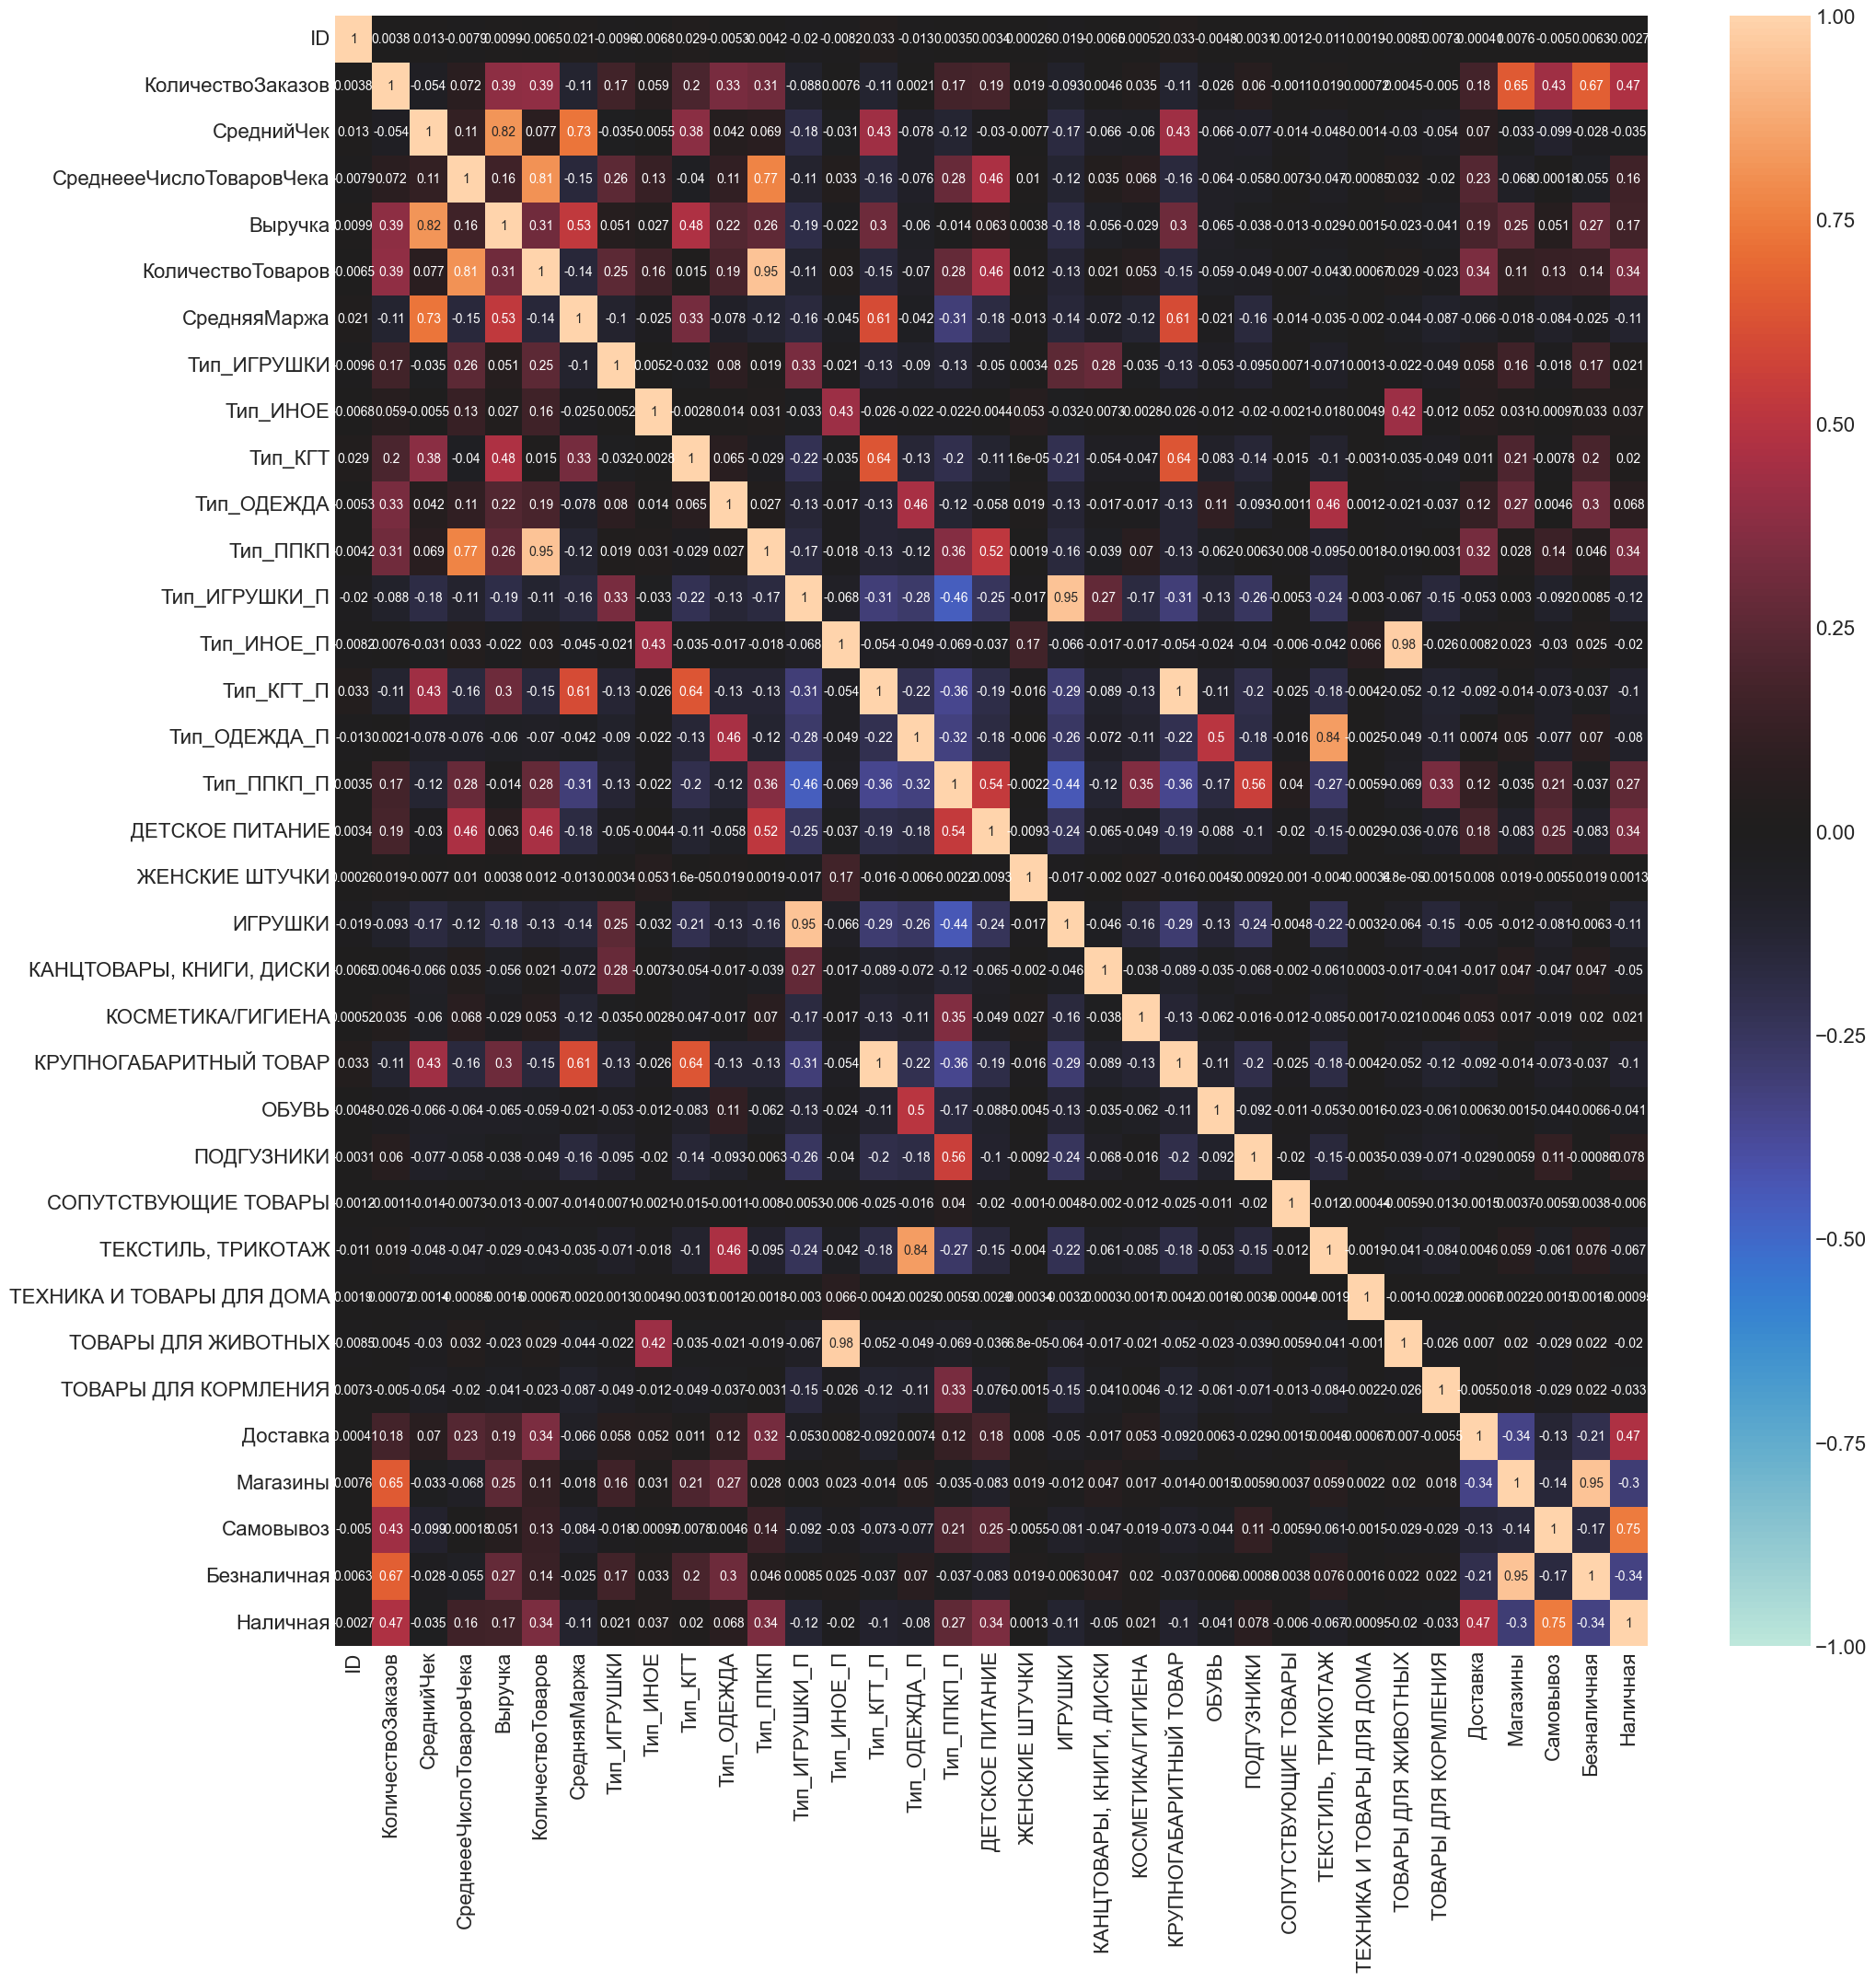

In [96]:
cor=clients.loc[:, clients.columns != 'ПоследнийЗаказ'].corr()
plt.figure(figsize=(23,23))
sns.heatmap(cor,annot=True, vmin=-1,vmax=1, center=0)

## 3. RFM-анализ


In [96]:
rfm = clients

In [97]:
rfm['ПоследнийЗаказ'] = pd.to_datetime(rfm['ПоследнийЗаказ'])

In [98]:
rfm['Месяц'] = rfm['ПоследнийЗаказ'].dt.month

In [99]:
rfm.head()

,ID,КоличествоЗаказов,СреднийЧек,СреднеееЧислоТоваровЧека,Выручка,КоличествоТоваров,СредняяМаржа,ПоследнийЗаказ,Тип_ИГРУШКИ,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,Тип_ИГРУШКИ_П,Тип_ИНОЕ_П,Тип_КГТ_П,Тип_ОДЕЖДА_П,Тип_ППКП_П,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Доставка,Магазины,Самовывоз,Безналичная,Наличная,Месяц
0,0,1,1039.0,5.0,1039.0,5,34.932,2017-07-04,5,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,7
1,1,1,1630.0,1.0,1630.0,1,376.020,2017-03-22,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,3
2,2,1,7666.0,1.0,7666.0,1,501.280,2017-09-03,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,9
3,3,1,876.0,8.0,876.0,8,14.035,2017-11-04,0,0,0,0,8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,11
4,4,1,3210.0,2.0,3210.0,2,162.390,2017-03-21,0,0,0,0,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,3


In [100]:
print(rfm['Наличная'].unique())

[ 0  1  2  4  3  6  5  9  8  7 10 34 13 12 24 11 21 14 15]


In [101]:
print(rfm['Доставка'].unique())

[ 0  1  3  2  6  4  5  7  8 14 13]


In [102]:
print(rfm['Магазины'].unique())

[ 1  0  2  3  4  5  6  9  7 21  8 10 14 11 13 12 18 22 30 16 20 49 15 33]


In [103]:
print(rfm['Самовывоз'].unique())

[ 0  1  2  4  3  5  6  9  7  8 10 34 13 12 24 11 19 22 15]


In [104]:
# Выгрузим результат работы в эксель
vitrina_cl = rfm
vitrina_cl.to_excel('rfmlast.xlsx', index=False)

/var/folders/fr/zst5qk_n0qq1fjn6yxf5jmg00000gn/T/ipykernel_11189/1602957129.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(price_plot, shade=True, color="g", label="", alpha=.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


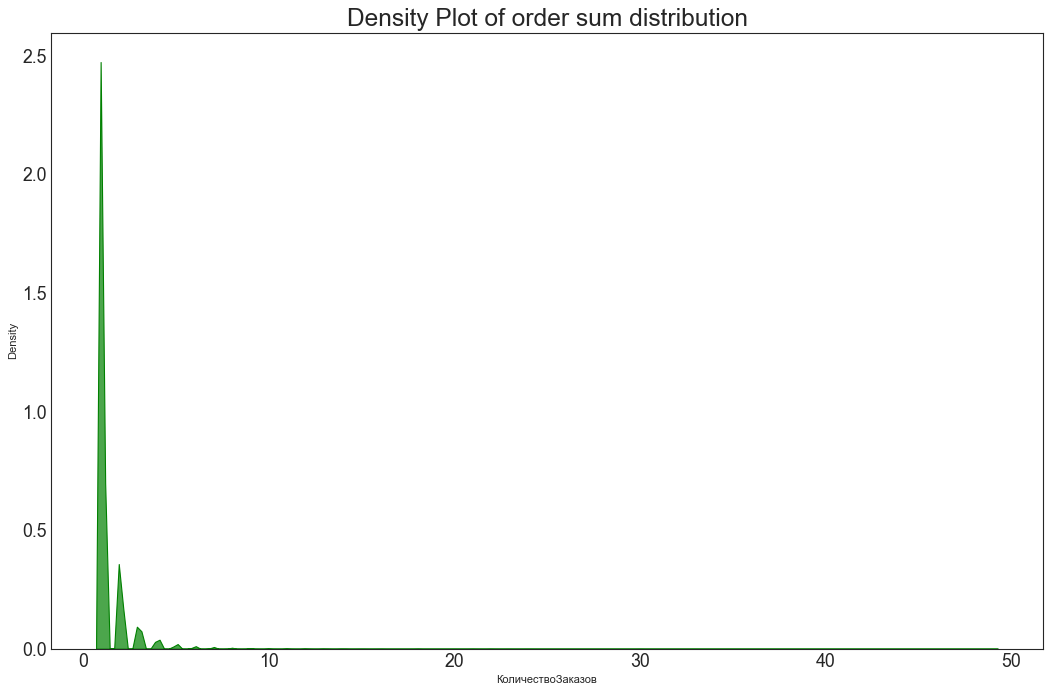

In [105]:
price_plot = rfm['КоличествоЗаказов'].sort_values()
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(price_plot, shade=True, color="g", label="", alpha=.7)

# Decoration
plt.title('Density Plot of order sum distribution', fontsize=22)
plt.legend()
plt.show()

## Весь рассчет rfm производился в экселе, все таблицы можно посмотреть там
у нас вышло восемь сегментов:  
111 - сегмент тех, которые сделали последний заказ в первые полгода,количество заказов не превышало 3, выручка не превышала 5000  

112 - сегмент тех, которые сделали последний заказ в первые полгода,количество заказов не превышало 3, выручка превышала 5000  

121 - сегмент тех, которые сделали последний заказ в первые полгода,количество заказов превышало 3, выручка не превышала 5000  

122 - сегмент тех, которые сделали последний заказ в первые полгода,количество заказов превышало 3, выручка превышала 5000  

211 - сегмент тех, которые сделали последний заказ во вторые полгода,количество заказов не превышало 3, выручка не превышала 5000  

212 - сегмент тех, которые сделали последний заказ  во вторые полгода,количество заказов не превышало 3, выручка превышала 5000  

221 - сегмент тех, которые сделали последний заказ во вторые полгода,количество заказов превышало 3, выручка превышала 5000  

111(57% - 46010 клиентов)    
Оплата чаще всего производилась безналичным расчетом(72%)     
Доставка - магазины(66%), доставка(18%) и самовывоз(14%)     
Средний чек - 1833      
Кол-во товаров - 4     
Кол-во заказов - 1      
Самые популярные товары - игрушки(35%),крупногабаритный товар(14%), текстиль, трикотаж(15%)     

112(14% - 11305 клиентов)  
Оплата чаще всего производилась безналичным расчетом(70%)  
Доставка - магазины(64%), доставка(29%) и самовывоз(7%)   
Средний чек - 8922   
Кол-во товаров - 10   
Кол-во заказов - 1    
Самые популярные товары - крупногабаритный товар(45%), игрушки(13%),текстиль,трикотаж(10%)   
121(2% - 1754 клиентов)   
Оплата чаще всего производилась безналичным расчетом(59%)   
Доставка - магазины(57%), доставка(9%) и самовывоз(34%)   
Средний чек - 986  
Кол-во товаров - 14   
Кол-во заказов - 3   
Самые популярные товары - игрушки(20%), детское питание(27%), подгузники(19%)  
122(5% - 4036 клиентов)  
Оплата чаще всего производилась безналичным расчетом(60%)   
Доставка - магазины(56%), доставка(21%) и самовывоз(22%)   
Средний чек - 3168   
Кол-во товаров - 33   
Кол-во заказов - 4   
Самые популярные товары - детское питание(32%), подгузники(18%), текстиль, трикотаж(14%)  
211(18% - 14282 клиентов)  
Оплата чаще всего производилась безналичным расчетом(72%)  
Доставка - магазины(65%), доставка(22%) и самовывоз(13%)   
Средний чек - 1867  
Кол-во товаров - 4   
Кол-во заказов - 1    
Самые популярные товары - игрушки(28%), подгузники(15%), текстиль, трикотаж(14%)  
212(4% - 3217 клиентов)    
Оплата чаще всего производилась безналичным расчетом(70%)   
Доставка - магазины(64%), доставка(30%) и самовывоз(7%)   
Средний чек - 9544   
Кол-во товаров - 8   
Кол-во заказов - 1   
Самые популярные товары - крупногабаритный товар(50%), игрушки(11%), детское питание(10%)   
221(0,0017% - 139 клиентов)   
Оплата чаще всего производилась безналичным расчетом(53%)    
Доставка - магазины(51%), доставка(14%) и самовывоз(35%)    
Средний чек - 998   
Кол-во товаров - 12   
Кол-во заказов - 3   
Самые популярные товары - детское питание(30%), текстиль, трикотаж(16%), подгузники(15%)   
222(0,0026% - 212 клиентов)    
Оплата чаще всего производилась безналичным расчетом(61%)   
Доставка - магазины(58%), доставка(21%) и самовывоз(22%)    
Средний чек - 3263   
Кол-во товаров - 22   
Кол-во заказов - 3   
Самые популярные товары - детское питание(25%), текстиль, трикотаж(17%), подгузники(17%)    

## Предложение для клиентов на основе анализа   
Стимулировать услуги доставки, так как во всех сегментах преобладает выдача заказа в магазине   
Упростить наличную оплату, так как во всех сегментах наиболее популярен безналичный расчет    
Наиболее популярные товары: игрушки,детское питание,текстиль, трикотаж, подгузники,крупногабаритный товар     

## Вторая сегментация: DBSCAN

In [97]:
# Определяем модель
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
dbscan = DBSCAN()
l, k_test = train_test_split(clients, test_size=0.3, random_state=42)
l=l.drop(['ПоследнийЗаказ' ,'ID'],axis=1)
data = l.values
# Обучаем
dbscan.fit(l.values)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(l.values)
pca_2d = pca.transform(l.values)



In [99]:
  # scaling and normalizing the dataset
from sklearn.preprocessing import StandardScaler
data=l
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

In [100]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0  0.906896  0.061415
1 -0.283216 -0.464865
2 -0.217598 -0.362991
3  0.199841 -0.125786
4  0.456763  0.087022


In [101]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())


       КоличествоЗаказов  СреднийЧек  СреднеееЧислоТоваровЧека  Выручка  \
6265                   1      2297.0                       2.0   2297.0   
54886                  1      4364.0                       8.0   4364.0   
76820                  1      1293.0                       1.0   1293.0   
860                    2       931.0                       3.0   1862.0   
15795                  1      8440.0                       1.0   8440.0   

       КоличествоТоваров  СредняяМаржа  Тип_ИГРУШКИ  Тип_ИНОЕ  Тип_КГТ  \
6265                   2     260.50000            2         0        0   
54886                  8      81.90125            2         0        0   
76820                  1     258.84000            1         0        0   
860                    6     158.01000            6         0        0   
15795                  1    3343.00000            0         0        1   

       Тип_ОДЕЖДА  Тип_ППКП  Тип_ИГРУШКИ_П  Тип_ИНОЕ_П  Тип_КГТ_П  \
6265            0         0        

In [102]:
data.cluster.unique()

array([ 0,  1,  2, -1,  3,  4,  7,  5,  6])

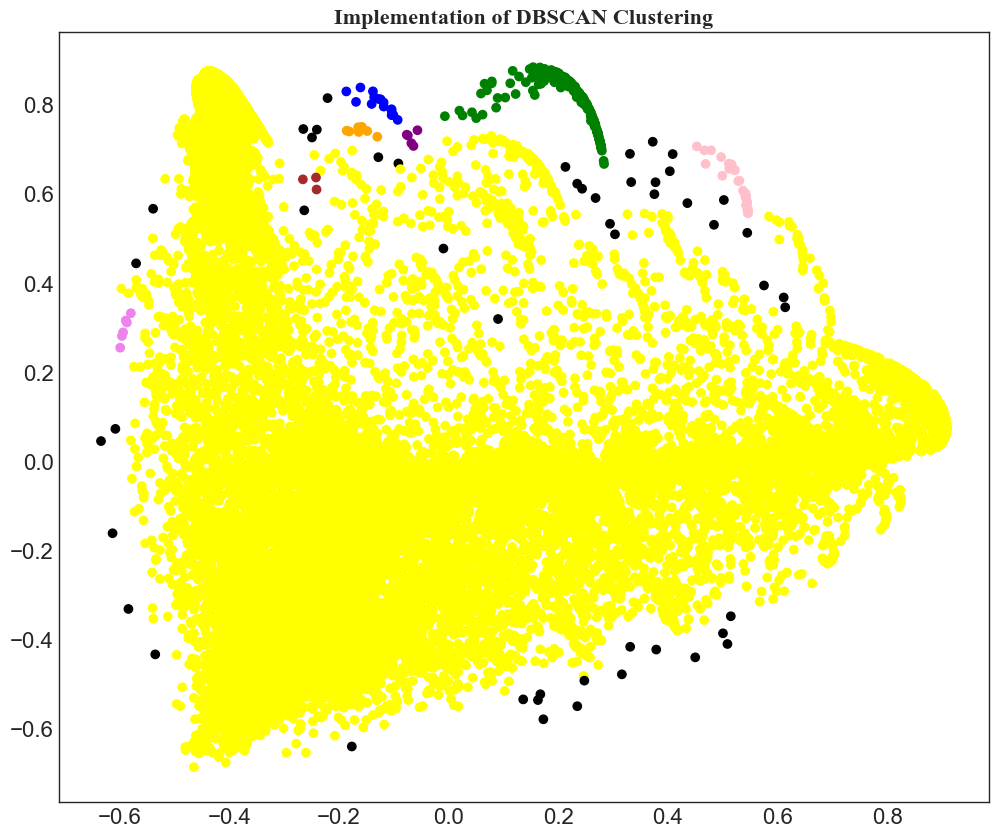

In [103]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red', 3:'pink', 4:'orange', -1:'black',7:'violet',6:'brown',5:'purple'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

In [104]:
data.head()

,КоличествоЗаказов,СреднийЧек,СреднеееЧислоТоваровЧека,Выручка,КоличествоТоваров,СредняяМаржа,Тип_ИГРУШКИ,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,Тип_ИГРУШКИ_П,Тип_ИНОЕ_П,Тип_КГТ_П,Тип_ОДЕЖДА_П,Тип_ППКП_П,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Доставка,Магазины,Самовывоз,Безналичная,Наличная,cluster
58349,1,1165.000,3.0,1165.00,3,84.260000,3,0,0,0,0,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0,1,0,1,0,0
21749,1,778.000,2.0,778.00,2,8.140000,0,0,0,0,2,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0,0,1,0,1,0
2391,1,465.000,3.0,465.00,3,16.846667,0,0,0,0,3,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.666667,0,1,0,1,0,0
68610,2,1718.935,9.0,3437.87,18,37.095556,11,0,0,3,4,0.611111,0.0,0.0,0.166667,0.222222,0.222222,0.0,0.222222,0.388889,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0,2,0,2,0,0
2797,1,2974.000,2.0,2974.00,2,910.240000,2,0,0,0,0,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0,1,0,1,0,0


In [105]:
#Коэффициент силуэта находится в диапазоне от -1 до 1, где более высокое значение указывает на лучшее качество кластеризации.

#Коэффициент силуэта, близкий к 0, указывает на перекрывающиеся кластеры, а отрицательные значения указывают на то, что образцы могли быть отнесены к неправильным кластерам. В целом коэффициент силуэта ниже 0,2 считается слабым, а значения выше 0,5 считаются сильными.
#Как мы можем видеть, наш коэффициент ниже 0,2, алгоритм применять не стоит
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x_principal, labels)
print("The Silhouette Coefficient is:", silhouette_avg)

The Silhouette Coefficient is: -0.15405393758625138


In [177]:
# Выгрузим результат работы в эксель
dbscanres = data
dbscanres.to_excel('dbscanres.xlsx', index=False)

In [178]:
#дальнейшая статистика по сегментам производилась в эксель


# KMeans - третья сегментация

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [107]:
df = clients

In [108]:
# В колонке ID находится ID, 
# его нужно удалить перед кластеризацией
del df['ID']

In [109]:
del df['ПоследнийЗаказ']

In [110]:
df = df.drop(['СреднийЧек','СреднеееЧислоТоваровЧека','Тип_ИГРУШКИ_П','Тип_ИНОЕ_П','Тип_КГТ_П','Тип_ОДЕЖДА_П','Тип_ППКП_П'],axis=1)

In [111]:
features_value = df.values
features_value

array([[1.000e+00, 1.039e+03, 5.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.630e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 7.666e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 3.178e+03, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 1.634e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 2.465e+04, 1.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [112]:
#стандартизируем
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_value)

In [113]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
inertia = []
distortions = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_standardized)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(cdist(features_standardized,
    km.cluster_centers_, 'euclidean'),axis=1)) /
    features_standardized.shape[0])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

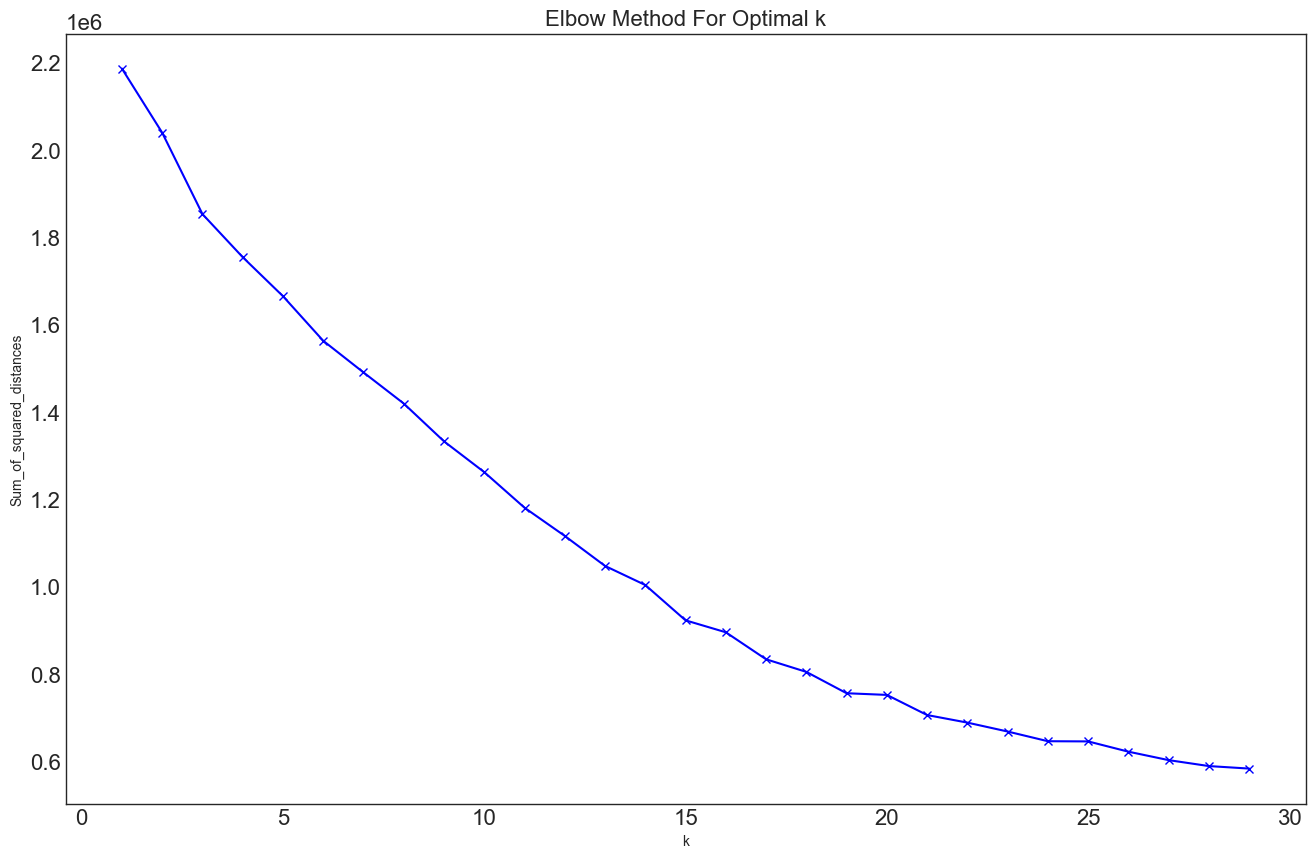

In [114]:
#метод локтя
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [115]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 30), inertia, curve="convex", direction="decreasing")
kl.elbow

17

In [116]:
from sklearn.metrics import silhouette_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

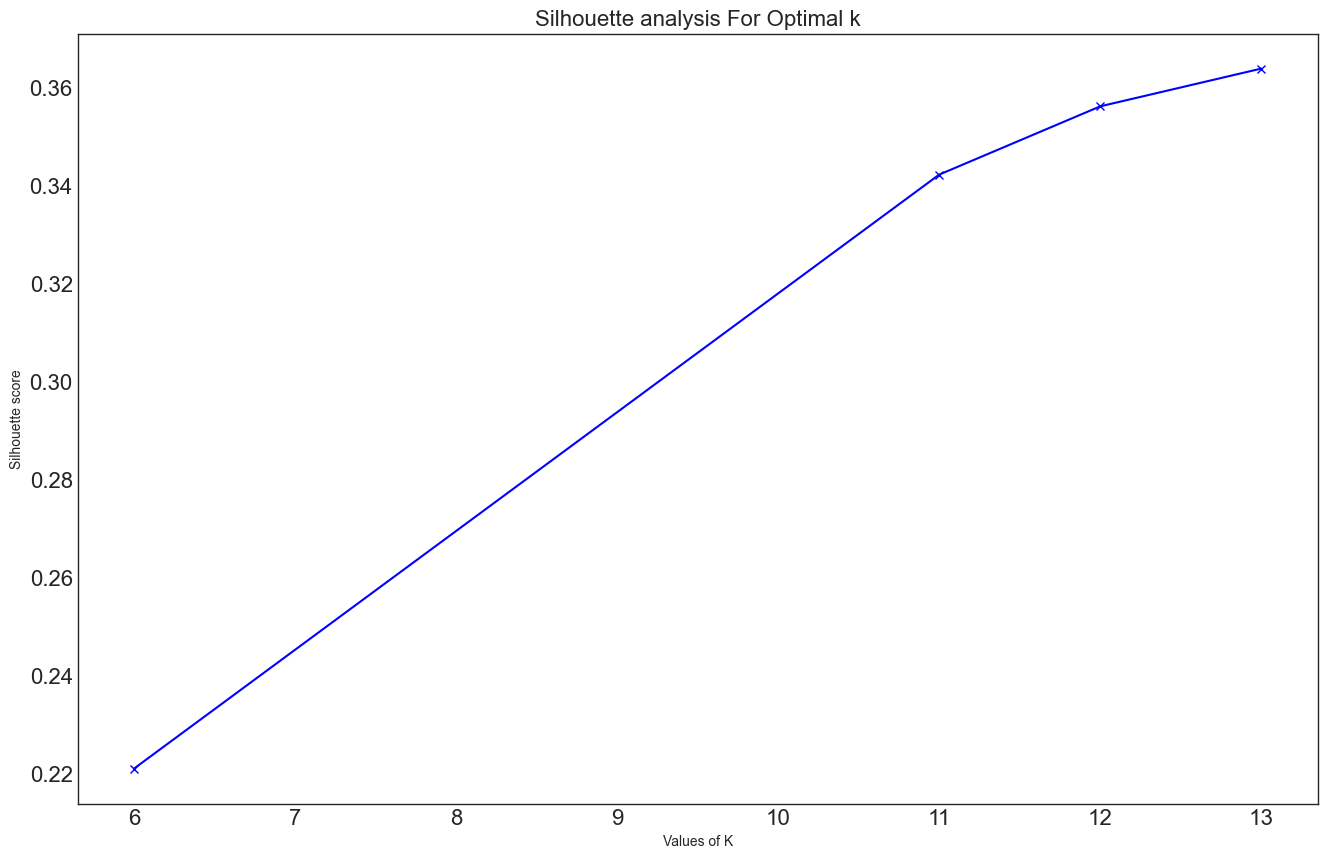

In [117]:
#метод силуэтов показал, что количество кластеров должно быть равно 11
range_n_clusters = [6,11, 12,13]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(features_standardized)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(features_standardized, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [118]:
#метод калински показал,что кол-во кластеров должно быть равно 13
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Define the range of k values to evaluate
k_values = range(3, 14)  # Start from k=2 as it requires a minimum of two clusters

# Calculate the Calinski-Harabasz index for each k value
ch_scores = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(features_standardized)
    ch_score = calinski_harabasz_score(features_standardized, labels)
    ch_scores.append(ch_score)

# Find the optimal k value with the highest Calinski-Harabasz index
optimal_k = k_values[np.argmax(ch_scores)]

# Print the optimal k value
print("Optimal k:", optimal_k)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

Optimal k: 13


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


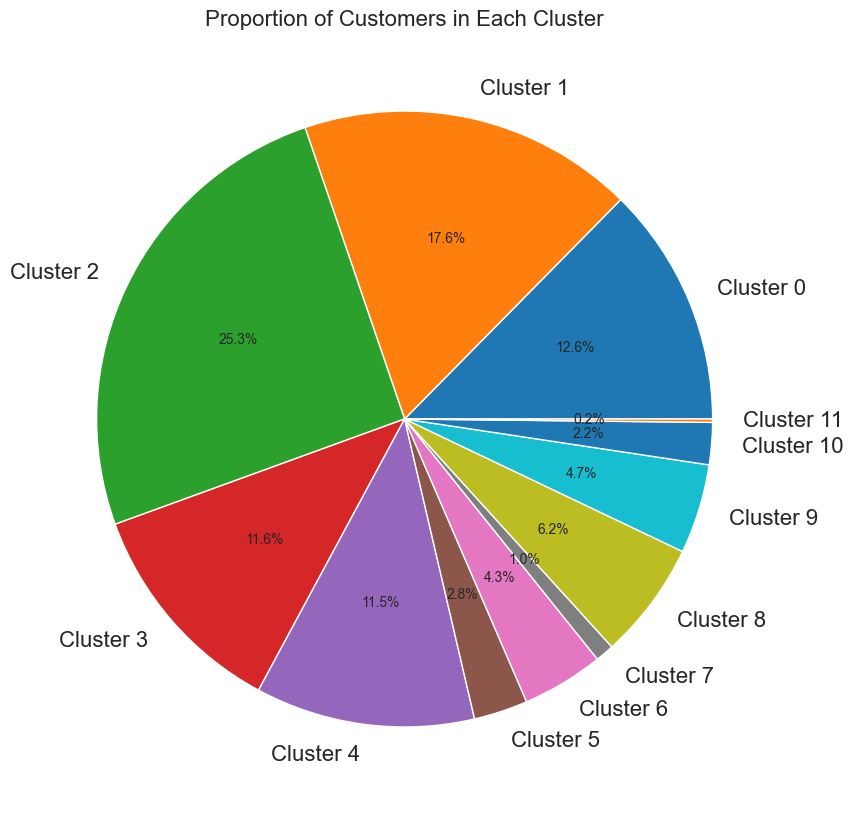

In [119]:
#распределение по 12 сегментам

# Perform K-means clustering
kmeans = KMeans(n_clusters=12, random_state=100)
kmeans.fit(features_standardized)
cluster_labels = kmeans.labels_

# Count the number of customers in each cluster
cluster_counts = np.bincount(cluster_labels)

# Generate labels for the pie chart
cluster_labels = [f'Cluster {i}' for i in range(12)]

plt.pie(cluster_counts, labels=cluster_labels, autopct='%1.1f%%')
plt.title('Proportion of Customers in Each Cluster')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


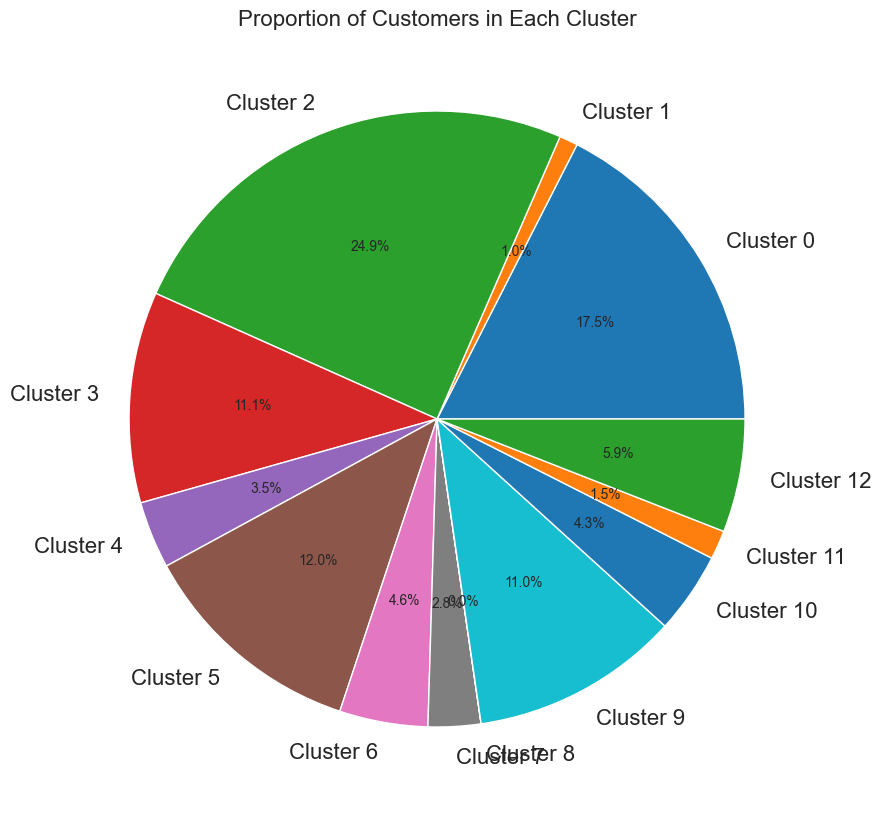

In [120]:
#распределение по 13 сегментам

# Perform K-means clustering
kmeans = KMeans(n_clusters=13, random_state=100)
kmeans.fit(features_standardized)
cluster_labels = kmeans.labels_

# Count the number of customers in each cluster
cluster_counts = np.bincount(cluster_labels)

# Generate labels for the pie chart
cluster_labels = [f'Cluster {i}' for i in range(13)]

plt.pie(cluster_counts, labels=cluster_labels, autopct='%1.1f%%')
plt.title('Proportion of Customers in Each Cluster')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


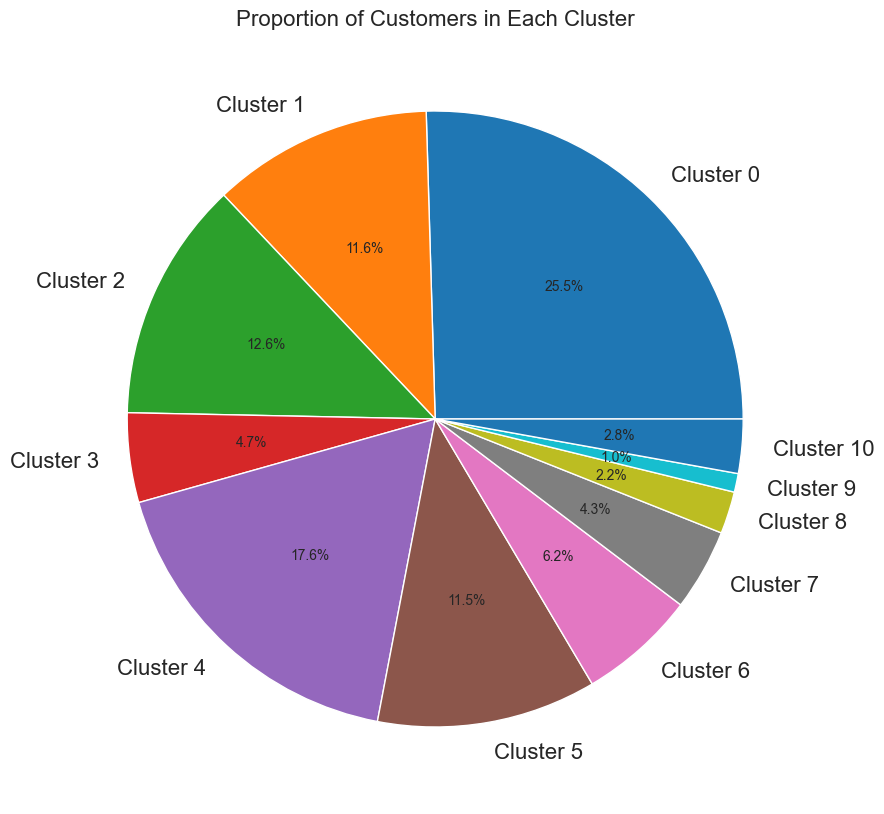

In [121]:
#распределение по 11 сегментам

# Perform K-means clustering
kmeans = KMeans(n_clusters=11, random_state=100)
kmeans.fit(features_standardized)
cluster_labels = kmeans.labels_

# Count the number of customers in each cluster
cluster_counts = np.bincount(cluster_labels)

# Generate labels for the pie chart
cluster_labels = [f'Cluster {i}' for i in range(11)]

plt.pie(cluster_counts, labels=cluster_labels, autopct='%1.1f%%')
plt.title('Proportion of Customers in Each Cluster')
plt.show()

In [122]:
model = KMeans(n_clusters=11, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(features_standardized)
y_kmeans = kmeans.predict(features_standardized)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,КоличествоЗаказов,Выручка,КоличествоТоваров,СредняяМаржа,Тип_ИГРУШКИ,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Доставка,Магазины,Самовывоз,Безналичная,Наличная
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.142044,2218.797119,1.863649,439.636173,0.095645,0.002277,0.025904,1.691432,0.048392,0.001285,0.000000,0.029200,0.003923,0.002984,0.009691,0.893523,0.007347,0.000095,0.047533,0.000000,0.000890,0.003530,0.272701,0.792485,0.076857,0.892400,0.249644
1,1.196035,2476.686444,5.817086,126.824377,1.123530,0.048596,0.126543,0.269317,4.249101,0.022120,0.003249,0.053077,0.135669,0.312163,0.023347,0.003962,0.067998,0.000568,0.029959,0.000335,0.002625,0.344929,0.251239,0.853533,0.091263,0.928662,0.267373
2,4.206885,10495.833287,21.305943,169.938607,5.219227,0.192270,0.668074,4.453719,10.772653,0.166251,0.002115,0.202192,0.051579,0.080142,0.050867,0.031881,0.140884,0.002407,0.204967,0.000177,0.006620,0.059916,0.189997,3.724261,0.292627,3.790841,0.416044
3,1.105878,2191.806305,3.010053,269.482642,2.684495,0.006487,0.049175,0.089140,0.180756,0.004251,0.000090,0.926163,0.020619,0.003773,0.014079,0.004010,0.009389,0.001407,0.010177,0.000032,0.001177,0.004836,0.207448,0.786263,0.112168,0.862428,0.243451
4,3.645215,13919.504571,104.405116,23.827161,2.734323,0.199670,0.376238,1.740099,99.354785,0.832086,0.000606,0.023591,0.007196,0.047821,0.005742,0.002309,0.038127,0.000358,0.021932,0.000012,0.001804,0.018414,1.735974,0.641914,1.267327,0.812706,2.832508
5,1.082675,7810.855469,1.514320,1970.622107,0.070260,0.001552,1.249647,0.060031,0.132830,0.001755,0.000057,0.017697,0.001146,0.003481,0.950839,0.001176,0.005341,0.000105,0.011021,0.000000,0.000323,0.007059,0.157802,0.823011,0.101862,0.846148,0.236527
6,1.112676,2077.985986,2.605634,291.471754,0.577465,0.000000,0.035211,0.154930,1.838028,0.008276,0.000000,0.190844,0.004225,0.007158,0.015091,0.003521,0.014353,0.724372,0.028096,0.000000,0.000000,0.004063,0.225352,0.760563,0.126761,0.823944,0.288732
7,1.549211,3974.262626,16.839100,45.571517,0.560072,0.042436,0.093383,0.270406,15.872803,0.823296,0.000193,0.027777,0.004955,0.034415,0.007866,0.003126,0.063788,0.000325,0.013901,0.000012,0.001615,0.018732,0.504535,0.458963,0.585713,0.519987,1.029224
8,1.358738,3032.836748,3.327852,109.350131,0.133874,0.008888,0.047106,0.068326,3.069659,0.014140,0.000041,0.026623,0.003223,0.023210,0.012994,0.002795,0.891385,0.000128,0.011851,0.000000,0.001928,0.011681,0.176980,0.806688,0.375069,0.853905,0.504833


In [123]:
cluster_counts = df['cluster'].value_counts()

In [124]:
cluster_counts

3     20193
5     14176
1     10289
10     9633
8      9001
7      8931
0      3513
2      3079
4      1212
9       786
6       142
Name: cluster, dtype: int64

In [125]:
centers = model.cluster_centers_
centers
centroid = pd.DataFrame(centers)
centroid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-0.219516,-0.339887,-0.294742,-0.077157,-0.276193,-0.055070,-0.389530,0.353333,-0.278631,-0.396097,-0.036768,-0.573505,-0.171870,-0.285334,-0.462145,4.489769,-0.406999,-0.054703,-0.262659,-0.009327,-0.101654,-0.263761,0.007754,-0.097519,-0.204354,-0.064571,-0.202231
1,-0.165161,-0.293541,-0.071032,-0.361120,-0.016184,-0.035143,-0.248462,-0.195610,-0.025634,-0.324401,0.168092,-0.514634,0.833968,1.483934,-0.424960,-0.212152,-0.199384,-0.040845,-0.321364,0.042965,-0.083303,1.538495,-0.029103,-0.032622,-0.181852,-0.025534,-0.179549
2,2.865995,1.147595,0.805421,-0.321982,1.019840,0.026668,0.510612,1.419590,0.367261,0.171576,0.096623,-0.146984,0.191970,0.156199,-0.350020,-0.064579,0.050115,0.013080,0.263220,0.018300,-0.041067,0.033905,-0.134275,3.019128,0.132685,3.055657,0.010666
3,-0.255925,-0.344738,-0.229871,-0.231618,0.378669,-0.053259,-0.356910,-0.265160,-0.270659,-0.385891,-0.031090,1.637993,-0.044402,-0.280821,-0.450196,-0.211900,-0.400011,-0.016251,-0.387443,-0.004351,-0.098619,-0.256867,-0.104305,-0.104134,-0.149198,-0.096837,-0.210155
4,2.300536,1.762869,5.507673,-0.454618,0.391273,0.029852,0.101539,0.372119,5.702314,2.462821,0.001457,-0.587333,-0.146881,-0.028755,-0.472897,-0.220887,-0.301635,-0.046982,-0.348175,-0.007485,-0.091984,-0.185188,2.520639,-0.257585,1.655192,-0.150362,3.102358
5,-0.279285,0.665072,-0.314509,1.312637,-0.282614,-0.055382,1.325813,-0.276396,-0.273545,-0.394479,-0.033167,-0.601865,-0.193073,-0.282492,2.100612,-0.226879,-0.413866,-0.054411,-0.384622,-0.009327,-0.107640,-0.245129,-0.189563,-0.065069,-0.165295,-0.114361,-0.219014
6,-0.249081,-0.365193,-0.252756,-0.211657,-0.154314,-0.056050,-0.376483,-0.239765,-0.170846,-0.372039,-0.036768,-0.174964,-0.169562,-0.261447,-0.447441,-0.214482,-0.383016,21.176553,-0.327587,-0.009327,-0.111060,-0.260947,-0.073559,-0.131454,-0.126404,-0.138265,-0.152221
7,0.190397,-0.024409,0.552660,-0.434879,-0.158714,-0.037793,-0.294944,-0.195190,0.674429,2.432571,-0.024616,-0.577011,-0.163995,-0.105473,-0.467113,-0.216571,-0.213794,-0.047954,-0.375004,-0.007508,-0.093989,-0.183505,0.405883,-0.452072,0.590492,-0.465481,0.795185
8,-0.001360,-0.193595,-0.211888,-0.376983,-0.266522,-0.052226,-0.359811,-0.273194,-0.096668,-0.351861,-0.034170,-0.579858,-0.177214,-0.169592,-0.453150,-0.218318,2.619168,-0.053732,-0.381849,-0.009327,-0.090679,-0.220728,-0.156628,-0.082420,0.261462,-0.106011,0.124264
9,-0.006443,-0.227355,0.366953,-0.406264,-0.223148,4.602439,-0.343805,-0.220010,-0.151513,-0.334136,-0.027228,-0.616135,-0.175073,-0.243319,-0.477100,-0.222731,-0.400700,-0.052674,-0.399753,-0.009327,9.701239,-0.257326,0.094399,0.136606,-0.296585,0.153984,-0.191196


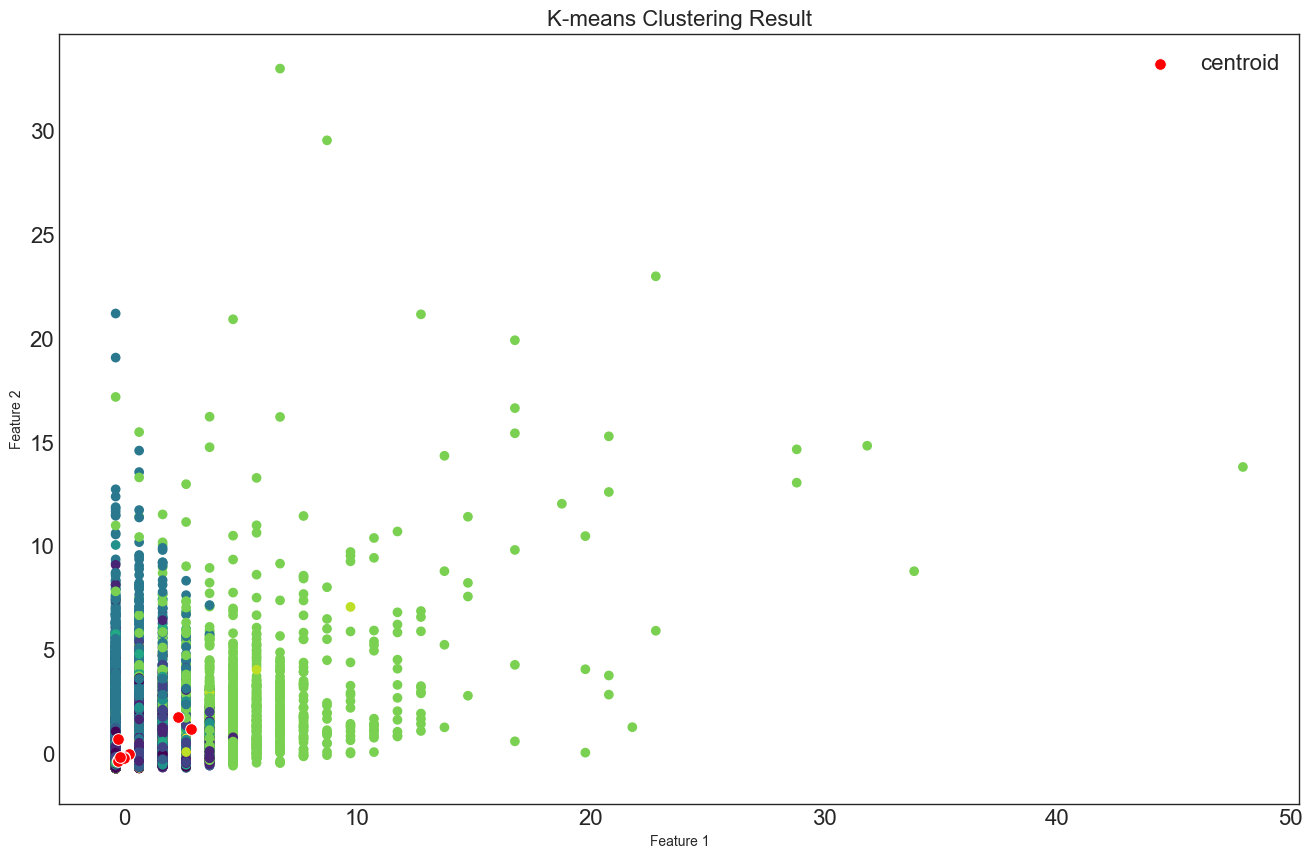

In [126]:
import matplotlib.pyplot as plt

# Assuming you have the following variables:
# features_value: The feature matrix used for clustering
# y_kmeans: The cluster labels assigned by K-means

# Create a scatter plot of the data points with colors representing the clusters
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=y_kmeans, cmap='viridis')
sns.scatterplot(x = centers[:,0], y = centers[:,1], marker="o", color='r', s = 70, label="centroid")
# Add labels and title to the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Result')

# Show the plot
plt.show()

In [150]:
# Выгрузим результат работы в эксель
kmeansres = df
kmeansres.to_excel('kmeansres.xlsx', index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/io/formats/excel.py:100: ResourceWarning: unclosed file <_io.BufferedWriter name='vitrina_.xlsx'>
  super().__init__(row=row, col=col, val=val, style=style, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/io/formats/excel.py:100: ResourceWarning: unclosed file <_io.BufferedWriter name='/var/folders/fr/zst5qk_n0qq1fjn6yxf5jmg00000gn/T/openpyxl.sb8p27qk'>
  super().__init__(row=row, col=col, val=val, style=style, **kwargs)


In [ ]:
#вся статистика собрана в экселе и в табличке со средними значениями

In [127]:
#Коэффициент силуэта находится в диапазоне от -1 до 1, где более высокое значение указывает на лучшую кластеризацию.

#Коэффициент силуэта 0,36 можно считать умеренным. Это говорит о том, что образцы в каждом кластере в некоторой степени хорошо соответствуют своим собственным кластерам по сравнению с другими кластерами, но все еще есть возможности для улучшения.

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features_standardized, y_kmeans)
print("The Silhouette Coefficient is:", silhouette_avg)


The Silhouette Coefficient is: 0.36047039094404254


In [128]:
#Индекс Калински-Харабаша — это мера качества кластеризации, которая оценивает разделение между кластерами и компактность внутри кластеров. Более высокий индекс Калински-Харабаш указывает на лучшие результаты кластеризации.

#Индекс Калински-Харабаса 6787,6773735903525 можно считать хорошим. Это предполагает, что кластеры хорошо разделены и компактны внутри себя, что приводит к четкому различию между различными группами в данных.

from sklearn.metrics import calinski_harabasz_score

calinski_score = calinski_harabasz_score(features_standardized, y_kmeans)
print("The Calinski-Harabasz Index is:", calinski_score)


The Calinski-Harabasz Index is: 6787.6773735903525


In [130]:
#Индекс Боулдина — это мера качества кластеризации, где более низкое значение указывает на лучшую кластеризацию.
#значение индекса Боулдина 0,2480105130618571 предполагает, что кластеры, сформированные вашим алгоритмом, имеют относительно низкие расстояния внутри кластера и большие расстояния между кластерами.
import numpy as np

# Compute the pairwise distances between cluster centers
cluster_centers = model.cluster_centers_
cluster_distances = pairwise_distances(cluster_centers)

# Calculate the average distance within each cluster
avg_intra_cluster_distances = []
for i in range(len(cluster_centers)):
    indices = np.where(model.labels_ == i)[0]
    distances = pairwise_distances(features_standardized[indices])
    avg_intra_cluster_distances.append(np.mean(distances))

# Calculate the Bouldin Index
bouldin_index = np.mean(np.divide(avg_intra_cluster_distances, np.max(cluster_distances, axis=1)))

print("The Bouldin Index is:", bouldin_index)


The Bouldin Index is: 0.2480105130618571
